# <center> **Classification**



## **Motivation** 

<p align="justify"> In the last decade, computational imaging has emerged as a vibrant field of research. A wide variety of computational cameras have been  demonstrated - some designed to achieve new imaging functionalities, and others to reduce  the complexity of traditional imaging.[1] 
This camera revolution over the past decades has made it easy to capture high quality images and this has led to the availability of large numbers of high-quality images that can be used for various purposes such as research, marketing, and entertainment. </p>

<p align="justify"> While the camera revolution has exponentially increased the availability of images, the revolution in artificial intelligence methods has provided the means to efficiently process and extract valuable information from these vast image datasets. These methods, specifically machine learning and deep learning, have proven to be very effective in image classification, object detection, segmentation and other computer vision tasks. In this exercise specifically, we will focus on image classification. So what is image classification?</p>

<p align="justify"> classification is a fundamental task that attempts to comprehend an entire image as a whole. The goal is to classify the image by assigning it to a specific label. Typically, Image Classification refers to images in which only one object appears and is analyzed.[2]
So, in our exercise, we are dealing with a problem of classification of images of faces. The classification criterion is not described here.
described here, it is defined implicitly by the labels of the learning base.</p>

<p align="justify">To achieve this, we will first present some research results in the literature on image classification, secondly list the libraries needed for this work, thirdly import the data and describe the data, fourthly present the models and their estimates and finally choose the best model based on the basic criterion defined which is the HTER (half total error rate) and provide some recommendations in order to improve the work.</p>

## **Litterature review**

In the litterature, Convolutional neural networks (CNNs) are the most widely used models for image classification, as they can learn hierarchical features from raw pixels and achieve high accuracy on various datasets.

<p align="justify">However, designing and training CNNs is not trivial, as it involves many choices such as the number and size of layers, the type and order of operations, the initialization and regularization methods, etc. Moreover, different datasets may require different architectures and hyperparameters to achieve optimal performance. Therefore, researchers have proposed various methods to improve CNNs for image classification, such as using pre-trained models, scaling strategies, architecture search, etc.</p>

<p align="justify">Thus,Ulloa, Ballesteros and Renza (2021) in their paper entitled "Video forensics: identifying colorized images using deep learning" presents two CNN-based models for detecting colorized images or videos, which are edited to add or change colors. Colorized images or videos can be used to create fake or misleading content that can affect the forensic field. The paper proposes a custom model and a transfer-learning-based model, and compares them with each other and with other existing models. The paper evaluates the models on different hyperparameters and metrics, such as HTER (half total error rate), precision, recall, F1-score, and inference time. The paper finds that the transfer-learning-based model has higher accuracy than the custom model, but the custom model is much faster. The paper claims that both models outperform other models in the literature in terms of generalization.[3]</p>

<p align="justify"> Shibata et al.(2018) in their paper entitled "Development of a deep residual learning algorithm to screen for glaucoma from fundus photography" developed a deep residual learning algorithm to screen for glaucoma from fundus photography and measure its diagnostic performance compared to Residents in Ophthalmology. To achieve their purpose, their model has been trained on 3,132 images and tested on 110 images. They found that the deep learning algorithm achieved significantly higher diagnostic performance compared to Residents in Ophthalmology; with ResNet model, the AROC(Area under the Receiver Operating Characteristic Curve) from all testing data was 96.5 (95% confidence interval [CI]: 93.5 to 99.6)% while the AROCs obtained by the three Residents were between 72.6% and 91.2%.[4]</p>

<p align="justify">Chan et al. (2015) presents in their paper a simple deep learning network for image classification, called PCANet, that uses cascaded principal component analysis (PCA), binary hashing, and block histograms. PCA learns multistage filter banks from data, while binary hashing and block histograms perform indexing and pooling. The work also studies two variations of PCANet, RandNet and LDANet, that use random filters or linear discriminant analysis (LDA) filters instead of PCA. The work evaluates these networks on various visual datasets for face verification, face recognition, and digit recognition. The results show that PCANet achieves state-of-the-art or even better performance than other features, including hand-crafted or deep learning features. The work also shows that PCANet can be a competitive baseline for texture classification and object recognition. The work demonstrates that a simple deep learning network with basic data processing components can be very effective for image classification.[5]</p>

<p align="justify"> Ali et al. (2022) in their paper entitled "Image Forgery Detection Using Deep Learning by Recompressing Images" proposes a deep learning based system for detecting image forgeries that are created by double image compression. Double image compression is a common technique to hide image manipulations, such as splicing or copy-move. The paper uses the difference between the original and recompressed versions of an image to train a convolutional neural network (CNN) model that can identify the presence of forgeries. The paper claims that the proposed model is lightweight, and its
performance demonstrates that it is faster than state-of-the-art approaches. The experiment results are encouraging, with an overall validation accuracy of 92.23%. [6] </p>

There is a large number of articles dealing with image classification. But we will use some of them as inspiration to implement our models and choose the best one.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns        
from sklearn.model_selection import train_test_split                                          
from tqdm import tqdm
from sklearn.metrics import accuracy_score     
import cv2                        
import matplotlib.pyplot as plt   
from tensorflow import keras
from PIL import Image as img
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

## Data 

The data available for this exercise are face images in sequence in a binary file. The images have already been cropped and resized. Each one is 56 x 56 x 3 bytes in size (color, interlaced) contained in the file db_train.raw with a total of 111430 images. This represents an image of 56 pixels in width, 56 pixels in height and 3 color channels (red, green and blue) for each pixel also known as the RGB color model.
The labels take the value 0 or 1 according to the image. They are contained in the file label_train.txt with a total number of 111430 lines. We convert all the data in array.

So, we divided the X's array because dividing an image array by a number is usually done to normalize the pixel values. Normalization is a common technique used in machine learning to scale the input data to a range that is more suitable for the model. In the case of images, dividing by 255 is often used to scale the pixel values from 0-255 to 0-1 . This can help improve the performance of the model by making it more robust to changes in lighting conditions and other factors that can affect the pixel values.

In [ ]:
#Fix the seed
np.random.seed(123)

### Import training dataset

In [ ]:
#Pixels coordinates
rows_pix = 56   
col_pix =  56
n = 111430
chan = 3

#Import trainning data 
o_file = open('/content/drive/MyDrive/Classification/db_train.raw', encoding = 'cp1252')
print(o_file)
db_train = np.fromfile(o_file, dtype = np.uint8, count = n * rows_pix * col_pix * chan)
X = db_train.reshape((n, rows_pix, col_pix, chan))

#import labels data
y = []
with open('/content/drive/MyDrive/Classification/label_train.txt', 'r') as file:
    for line in file:
        y.append(int(line[:-1]))
y = np.array(y)


print("X Shape :",X.shape)
print('Y Shape :',y.shape)
print("Different class :",np.unique(y,return_counts=True)[0])
print("Number of image for each class :",np.unique(y,return_counts=True)[1])

<_io.TextIOWrapper name='/content/drive/MyDrive/Classification/db_train.raw' mode='r' encoding='cp1252'>
X Shape : (111430, 56, 56, 3)
Y Shape : (111430,)
Different class : [0 1]
Number of image for each class : [15250 96180]


### Import Test dataset

In [ ]:
o_file_test = open('db_val.raw')
print(o_file_test )
db_test = np.fromfile(o_file_test , dtype = np.uint8, count = n * rows_pix * col_pix * chan)
X_test = db_train.reshape((n, rows_pix, col_pix, chan))

<_io.TextIOWrapper name='db_val.raw' mode='r' encoding='cp1252'>


### Visualization

In [ ]:
#Define function to print randomly a number of image that we ask
def display_image(X, labels_y, type_class,rows,columns):
    """
    The function display some images for different class
    
    X : Is the matrix of image
    labels_y : Is the matrix of labels
    type_class : Type of class. Here we have two value, 0 and 1
    rows : Number of rows to display
    columns : Number of columns to display
    """
    
    labels = [i for i,j in enumerate(labels_y) if j==type_class]
    fig = plt.figure(figsize=(12,6))
    fig.suptitle("Images with label {}".format(type_class))
    num_images = rows * columns
    for i in range(num_images):
        plt.subplot(rows,columns,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[labels[i]])
    plt.show()

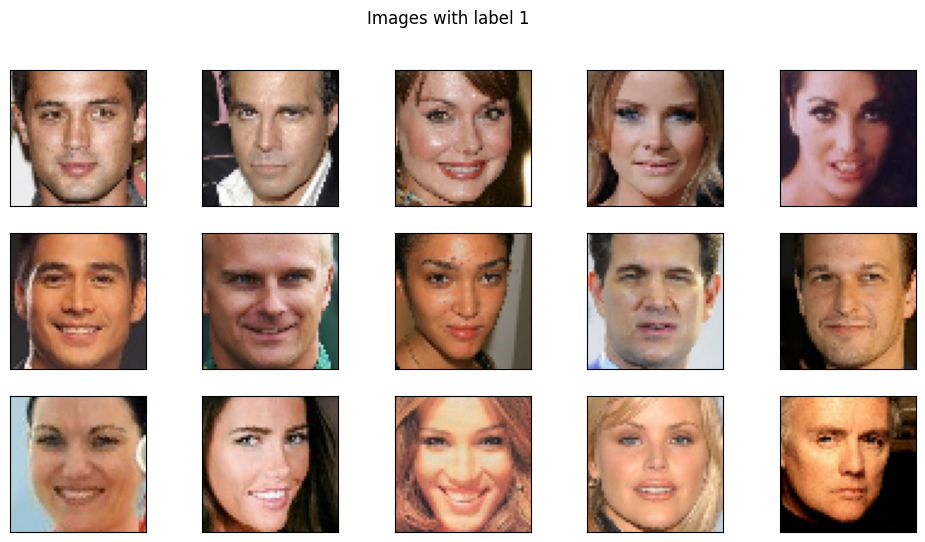

In [ ]:
#Display images with label 1
display_image(X,y,1,3,5)

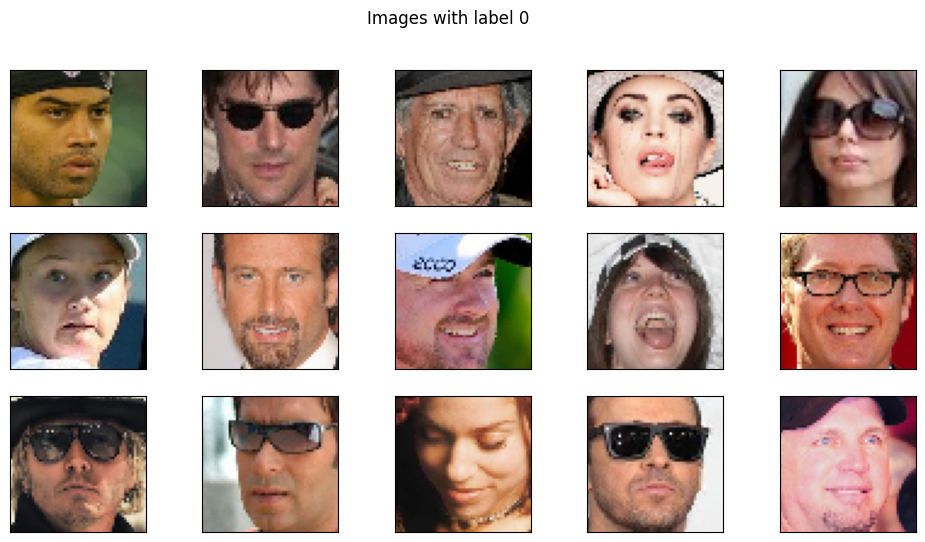

In [ ]:
#Display images with label 0
display_image(X,y,0,3,5)

### Some Statictics

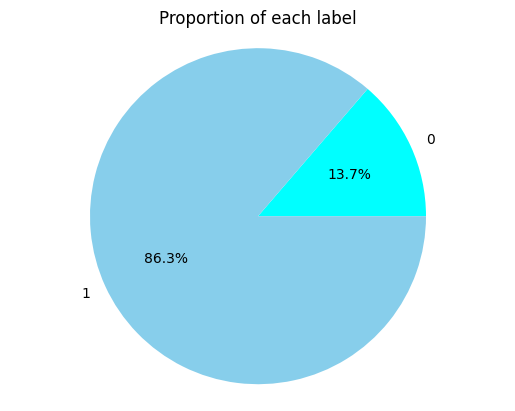

In [ ]:
#Pie graphic for train by label
lab, y_count = np.unique(y, return_counts=True)
color=['cyan','skyblue']
plt.pie(y_count,
        explode=(0, 0) , 
        labels=[0,1],
        autopct='%1.1f%%',colors=color)
plt.axis('equal')
plt.title('Proportion of each label')
plt.show()

So we have 86.3% of the image labeled as 1 and 13.7% labeled as 0.

In order to make better use of the data, we will divide the training database into two subsets, the training set and the validation set. The db_val database will be used as test data.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)

## **Models**

In this section we will present some models and their estimation results. Among these models, the best one will be the one with the smallest value of **HTER((half total error rate)**. So what is the HTER?

The Half Total Error Rate (HTER) is a one possible way to measure the detection performance, which combines the False Rejection Rate (FRR) and the False Acceptance Rate (FAR) and is defined in the following formula:

$HTER(\tau, \mathcal{D}) = \frac{FAR(\tau, \mathcal{D}) + FRR(\tau, \mathcal{D})}{2} * 100 $

where $\mathcal{D}$ denotes the dataset used. Since both the FAR and the FRR depends on the threshold $\tau$, they are strongly related to each other: increasing the FAR will reduce the FRR and vice-versa. For this reason, results are often presented using either a Receiver Operating Characteristic (ROC) or a Detection-Error Tradeoff (DET) plot, these two plots basically present the FAR versus the FRR for different values of the threshold [7].

In [ ]:
def HTER(y_test, y_pred):
    
    FAR, TAR, thresholds = roc_curve(y_test, y_pred)
    FRR = 1-TAR
    HTER = (FRR+FAR)/2
    
    best_threshold = thresholds[np.argmin(HTER)]
    
    min_HTER = min(HTER)*100
  
  return min_HTER, best_threshold

####  Convolutional Neural Network (CNN)

A convolutional neural network (CNN or convnet) is a subset of machine learning. It is one of the various types of artificial neural networks which are used for different applications and data types. A CNN is a kind of network architecture for deep learning algorithms and is specifically used for image recognition and tasks that involve the processing of pixel data.

**keras.layers.Conv2D** : This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs

**keras.layers.Dropout** : The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting

**keras.layers.MaxPool2D** : Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

**Dense** : Dense implements the operation

![CNN.jpg](attachment:CNN.jpg) [8]

In order to optimize our model we use **Adam (Adaptive Moment Estimation) optimizer**.
**Adam** is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm [9].

In [ ]:
cnn = keras.Sequential(
                            [
                                
                                # Input
                                keras.layers.Input(shape=(rows_pix, col_pix, chan)),
                                
                                # CNN
                                keras.layers.Conv2D(filters = 16,kernel_size=(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(rate = 0.1) , #Fraction of the input units to drop.
                                keras.layers.MaxPool2D(pool_size = (2,2), padding='valid'),
                                
                                keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(rate = 0.1),
                                keras.layers.MaxPool2D(pool_size = (2,2), padding='valid'),
                                
                                keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(rate = 0.1),
                                keras.layers.MaxPool2D(pool_size = (2,2),padding='valid'),
                                
                                keras.layers.Conv2D(filters = 64,kernel_size = (3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                
                                # Flatten
                                keras.layers.Flatten(),
                                
                                # Dense
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(50,activation='relu'),
                                keras.layers.Dense(10,activation='relu'),
                                
                                # Output
                                keras.layers.Dense(1,activation='sigmoid'),
                                
                            ]
    
                        )

#Summary the result
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 56, 56, 16)        448       
                                                                 
 dropout_3 (Dropout)         (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 dropout_4 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [ ]:
class EarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Stops training when 95% accuracy is reached
        '''
        # Get the current accuracy and check if it is above 95%
        if(logs.get('accuracy') > 0.95):
            # Stop training if condition is met
            print("\nThreshold reached. Stopping training...")
            self.model.stop_training = True

# Let's instantiate our ES class
early_stopping = EarlyStopping()

In [ ]:
#TRAIN THE MODEL
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

training = cnn.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
6240/6240 [==============================] - 331s 53ms/step - loss: 0.2486 - accuracy: 0.9167 - val_loss: 0.1623 - val_accuracy: 0.9380
Epoch 2/10
6240/6240 [==============================] - 328s 53ms/step - loss: 0.1635 - accuracy: 0.9399 - val_loss: 0.1441 - val_accuracy: 0.9460
Epoch 3/10
6240/6240 [==============================] - 322s 52ms/step - loss: 0.1537 - accuracy: 0.9435 - val_loss: 0.1533 - val_accuracy: 0.9433
Epoch 4/10
6240/6240 [==============================] - 323s 52ms/step - loss: 0.1523 - accuracy: 0.9429 - val_loss: 0.1486 - val_accuracy: 0.9427
Epoch 5/10
6240/6240 [==============================] - 323s 52ms/step - loss: 0.1440 - accuracy: 0.9464 - val_loss: 0.1364 - val_accuracy: 0.9460
Epoch 6/10
6240/6240 [==============================] - 323s 52ms/step - loss: 0.1384 - accuracy: 0.9473 - val_loss: 0.1383 - val_accuracy: 0.9450
Epoch 7/10
6240/6240 [==============================] - 334s 53ms/step - loss: 0.1341 - accuracy: 0.9489 - val_loss: 0

In [ ]:
#Store the accuracy and loss result in dataframe
training_history = pd.DataFrame(training.history)
training_history

In [ ]:
sns.set_theme(style = "darkgrid")
plt.figure(figsize = [12,9])
plt.plot(training_history["loss"])
plt.plot(training_history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Loss per epochs")
plt.show()

sns.set_theme(style = "darkgrid")
plt.figure(figsize = [12,9])
plt.plot(training_history["accuracy"])
plt.plot(training_history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy")
plt.title("Accuracy per epochs")
plt.show()

##### **Analysing Model performence on Test Data**

In [ ]:
ypred = []
for pred in cnn.predict(X_test):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(y_test,ypred))
print('\n\nClassification Report : \n\n',classification_report(y_test,ypred))

## **Transfer Learning using ResNet152V2**

##### **Load and structuring ResNet152V2 Model from Keras applications**

In [ ]:
out

NameError: ignored

In [ ]:
transfer = keras.applications.ResNet152V2(include_top=False, input_shape=(rows_pix, col_pix, chan))
for layer in transfer.layers:
    layer.trainable = False
inp = transfer.layers[0].input
out = transfer.layers[-2].output
out = keras.layers.Dense(50,activation='relu')(out)
out = keras.layers.Dense(25,activation='relu')(out)
out = keras.layers.Dense(10,activation='relu')(out)
out = keras.layers.Dense(5,activation='relu')(out)
out = keras.layers.Dense(1,activation='sigmoid')(out)
transfer = keras.Model(inputs=inp,outputs=out)
transfer.summary()

234545216/234545216 [==============================] - 2s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 56, 56, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 62, 62, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 28, 28, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 30, 30, 64)   0           ['conv1_conv[0][0]']             
                         

In [ ]:
transfer.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_trans = transfer.fit(X_train,y_train,batch_size=10,validation_split=0.3,epochs=10)

Epoch 1/10


ValueError: ignored

## **References**

[1] S. Nayar. Computational cameras: approaches, benefits and limits. Technical Report No. CUCS-001-11. Jan. 15, 2011.

[2] https://paperswithcode.com/task/image-classification

[3] Ulloa, C., Ballesteros, D.M. and Renza, D., 2021. Video forensics: identifying colorized images using deep learning. Applied Sciences, 11(2), p.476.

[4] Shibata N, Tanito M, Mitsuhashi K, Fujino Y, Matsuura M, Murata H, Asaoka R. Development of a deep residual learning algorithm to screen for glaucoma from fundus photography. Sci Rep. 2018 Oct 2;8(1):14665. doi: 10.1038/s41598-018-33013-w. PMID: 30279554; PMCID: PMC6168579.

[5] Chan, T.H., Jia, K., Gao, S., Lu, J., Zeng, Z. and Ma, Y., 2015. PCANet: A simple deep learning baseline for image classification?. IEEE transactions on image processing, 24(12), pp.5017-5032.

[6] Ali, S.S., Ganapathi, I.I., Vu, N.S., Ali, S.D., Saxena, N. and Werghi, N., 2022. Image forgery detection using deep learning by recompressing images. Electronics, 11(3), p.403.

[7] https://pythonhosted.org/bob/temp/bob.measure/doc/guide.html

[8] https://www.analyticsvidhya.com/blog/2022/01/convolutional-neural-network-an-overview/

[9] https://www.geeksforgeeks.org/intuition-of-adam-optimizer/